<a href="https://colab.research.google.com/github/Ashuralotus/Ashuralotus1/blob/main/Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas

In [13]:
import kagglehub
andrewmvd_udemy_courses_path = kagglehub.dataset_download('andrewmvd/udemy-courses')

print('Data source import complete.')

100%|██████████| 200k/200k [00:00<00:00, 58.5MB/s]

Extracting files...
Data source import complete.


In [16]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [20]:
# read data
courses_df = pd.read_csv('/content/sample_data/udemy_courses.csv') # Changed pd.read to pd.read_csv
#general info of this data
courses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


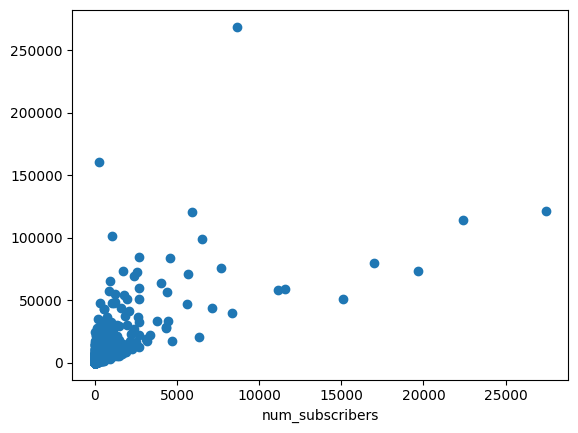

In [21]:
# get the y-axis, y = num_subscriber
temp_df1 = courses_df['num_subscribers']
y1 = temp_df1.values

# get the x-axis, x = num_reviews
# x_reviews
review_df = courses_df['num_reviews']
x1 = review_df.values

#draw scatter plot
plt.xlabel('num_reviews')
plt.xlabel('num_subscribers')
plt.scatter(x1, y1)
plt.show()

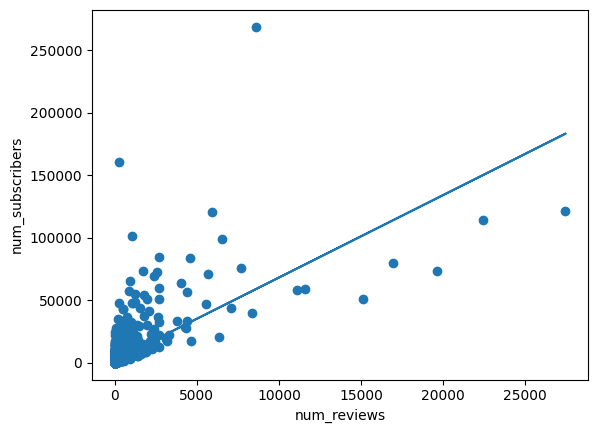

In [34]:
# get the num_subcribers and num_reviews column
temp_df2 = courses_df.iloc[:,[5,6]]

# filter these two columns with num_reviews <= 10000
filter_cols = temp_df2[temp_df2['num_reviews']<=10000]

# get the new x,y axis after filter
y1 = courses_df['num_subscribers'].values
x1 = courses_df['num_reviews'].values

# draw the trendline this time
slope, intercept, r, p, std_err = stats.linregress(x1,y1)
def myfunc(x1):
    return slope * x1 + intercept

mymodel = list(map(myfunc,x1))

plt.plot(x1,mymodel)

# draw scatter plot again
plt.xlabel('num_reviews')
plt.ylabel('num_subscribers')
plt.scatter(x1,y1)
plt.show()

In [26]:
corr, _ = pearsonr(x1, y1)
print ('Pearson"s correlation: %.3f' % corr)
      #we have a high positive correlation

Pearson"s correlation: 0.650


In [30]:
# prepare x and y variables
y1 = courses_df['num_subscribers'].values
x1 = courses_df['num_reviews'].values.reshape(-1, 1)
# building a regression model
model = LinearRegression().fit(x1,y1)
# round digits to two decimal places
model_coef = float('%.2f' % model.coef_)
model_intercept = float('%.2f' % model.intercept_)
# modelling
f'y = {model_coef}*x + {model_intercept}'


<ipython-input-30-cba60e058807>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  model_coef = float('%.2f' % model.coef_)


'y = 6.6*x + 2165.31'

In [32]:
# r-square value
r_sq = model.score(x1,y1)
r_sq = float('%.3f' % r_sq)
f'r-square value:{r_sq}'

# not very high r-square value

'r-square value:0.422'